
## N-gram Code Token Recommender for Java

### 1. Setup

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random
import warnings
warnings.filterwarnings('ignore')

from models.ngram_model import NGramModel
from utils.evaluation import calculate_perplexity, evaluate_topk_accuracy

# random seed
np.random.seed(42)
random.seed(42)

print("Setup complete!")

Setup complete!


### 2. Load Data

In [60]:
df = pd.read_csv('data/java_methods_dataset.csv')

# train and test splits
train_df = df[df['dataset_split'] == 'train']
test_df = df[df['dataset_split'] == 'test']

print(f"Training samples: {len(train_df)}")
print(f"Test samples: {len(test_df)}")

# Display available metrics that we can use for analysis
print(f"\nAvailable metrics columns:")
metric_cols = [col for col in train_df.columns if col.startswith('metrics_')]
for col in metric_cols:
    print(f"  - {col}")

Training samples: 19998
Test samples: 5000

Available metrics columns:
  - metrics_cyclomatic_complexity
  - metrics_n_ast_nodes
  - metrics_ast_depth
  - metrics_n_identifiers
  - metrics_vocab_size
  - metrics_n_whitespaces
  - metrics_n_words
  - metrics_nloc
  - metrics_token_counts



### 3. Experiment Configuration

In [61]:
# configurations to test
configurations = [
    {'n': 3, 'smoothing': 'none'},
    {'n': 3, 'smoothing': 'laplace'},
    {'n': 3, 'smoothing': 'add-k', 'k': 0.1},
    {'n': 3, 'smoothing': 'add-k', 'k': 0.5},
    
    {'n': 5, 'smoothing': 'none'},
    {'n': 5, 'smoothing': 'laplace'},
    {'n': 5, 'smoothing': 'add-k', 'k': 0.1},
    
    {'n': 7, 'smoothing': 'laplace'},
    {'n': 7, 'smoothing': 'add-k', 'k': 0.1},
    
    {'n': 11, 'smoothing': 'laplace'},
]

print(f"Will test {len(configurations)} configurations")

Will test 10 configurations


### 4. Run Experiments

In [62]:
results = []

for config in configurations:
    print(f"\n{'='*50}")
    print(f"Testing N={config['n']} with {config['smoothing']} smoothing")
    if 'k' in config:
        print(f"k = {config['k']}")
    print('-'*50)
    
    # Create and train model
    model = NGramModel(
        n=config['n'], 
        smoothing=config['smoothing'],
        k=config.get('k', 1.0)
    )
    model.train(train_df)
    
    # Calculate perplexity
    perplexity = calculate_perplexity(model, test_df.head(500))
    print(f"Perplexity: {perplexity:.2f}")
    
    # Calculate top-k accuracy
    accuracy = evaluate_topk_accuracy(model, test_df.head(200))
    print(f"Top-1 Accuracy: {accuracy['top1_accuracy']*100:.2f}%")
    print(f"Top-3 Accuracy: {accuracy['top3_accuracy']*100:.2f}%")
    print(f"Top-5 Accuracy: {accuracy['top5_accuracy']*100:.2f}%")
    
    # Store results
    results.append({
        'n': config['n'],
        'smoothing': config['smoothing'],
        'k': config.get('k', '-'),
        'perplexity': perplexity,
        'top1_acc': accuracy['top1_accuracy'],
        'top3_acc': accuracy['top3_accuracy'],
        'top5_acc': accuracy['top5_accuracy']
    })


Testing N=3 with none smoothing
--------------------------------------------------
Training 3-gram model...
Training complete. Vocabulary size: 95438
Perplexity: 748.91


Evaluating: 100%|██████████| 200/200 [00:02<00:00, 81.10it/s]


Top-1 Accuracy: 50.42%
Top-3 Accuracy: 68.22%
Top-5 Accuracy: 72.78%

Testing N=3 with laplace smoothing
--------------------------------------------------
Training 3-gram model...
Training complete. Vocabulary size: 95438
Perplexity: 2358.48


Evaluating: 100%|██████████| 200/200 [00:02<00:00, 72.49it/s]


Top-1 Accuracy: 50.42%
Top-3 Accuracy: 68.22%
Top-5 Accuracy: 72.78%

Testing N=3 with add-k smoothing
k = 0.1
--------------------------------------------------
Training 3-gram model...
Training complete. Vocabulary size: 95438
Perplexity: 676.21


Evaluating: 100%|██████████| 200/200 [00:02<00:00, 66.94it/s]


Top-1 Accuracy: 50.42%
Top-3 Accuracy: 68.22%
Top-5 Accuracy: 72.78%

Testing N=3 with add-k smoothing
k = 0.5
--------------------------------------------------
Training 3-gram model...
Training complete. Vocabulary size: 95438
Perplexity: 1590.81


Evaluating: 100%|██████████| 200/200 [00:03<00:00, 66.25it/s]


Top-1 Accuracy: 50.42%
Top-3 Accuracy: 68.22%
Top-5 Accuracy: 72.78%

Testing N=5 with none smoothing
--------------------------------------------------
Training 5-gram model...
Training complete. Vocabulary size: 95438
Perplexity: 45018.42


Evaluating: 100%|██████████| 200/200 [00:00<00:00, 335.83it/s]


Top-1 Accuracy: 63.62%
Top-3 Accuracy: 74.79%
Top-5 Accuracy: 77.54%

Testing N=5 with laplace smoothing
--------------------------------------------------
Training 5-gram model...
Training complete. Vocabulary size: 95438
Perplexity: 16774.94


Evaluating: 100%|██████████| 200/200 [00:00<00:00, 308.31it/s]


Top-1 Accuracy: 63.62%
Top-3 Accuracy: 74.79%
Top-5 Accuracy: 77.54%

Testing N=5 with add-k smoothing
k = 0.1
--------------------------------------------------
Training 5-gram model...
Training complete. Vocabulary size: 95438
Perplexity: 5767.85


Evaluating: 100%|██████████| 200/200 [00:00<00:00, 281.16it/s]


Top-1 Accuracy: 63.62%
Top-3 Accuracy: 74.79%
Top-5 Accuracy: 77.54%

Testing N=7 with laplace smoothing
--------------------------------------------------
Training 7-gram model...
Training complete. Vocabulary size: 95438
Perplexity: 38830.59


Evaluating: 100%|██████████| 200/200 [00:00<00:00, 500.81it/s]


Top-1 Accuracy: 72.07%
Top-3 Accuracy: 79.67%
Top-5 Accuracy: 81.49%

Testing N=7 with add-k smoothing
k = 0.1
--------------------------------------------------
Training 7-gram model...
Training complete. Vocabulary size: 95438
Perplexity: 17539.38


Evaluating: 100%|██████████| 200/200 [00:00<00:00, 469.12it/s]


Top-1 Accuracy: 72.07%
Top-3 Accuracy: 79.67%
Top-5 Accuracy: 81.49%

Testing N=11 with laplace smoothing
--------------------------------------------------
Training 11-gram model...
Training complete. Vocabulary size: 95438
Perplexity: 61109.71


Evaluating: 100%|██████████| 200/200 [00:00<00:00, 439.07it/s]

Top-1 Accuracy: 82.50%
Top-3 Accuracy: 86.66%
Top-5 Accuracy: 87.42%


### 5. Results Summary

In [63]:
results_df = pd.DataFrame(results)

# results table
print("\nEXPERIMENT RESULTS")
print("="*80)
print(results_df.to_string(index=False))

# best configurations
best_perp = results_df.loc[results_df['perplexity'].idxmin()]
best_acc = results_df.loc[results_df['top1_acc'].idxmax()]

print(f"\nBest Configurations:")
print(f"Lowest Perplexity: N={best_perp['n']}, {best_perp['smoothing']} (Perplexity: {best_perp['perplexity']:.2f})")
print(f"Highest Accuracy: N={best_acc['n']}, {best_acc['smoothing']} (Top-1: {best_acc['top1_acc']*100:.2f}%)")


EXPERIMENT RESULTS
 n smoothing    k   perplexity  top1_acc  top3_acc  top5_acc
 3      none    -   748.912441  0.504159  0.682218  0.727788
 3   laplace    -  2358.481524  0.504159  0.682218  0.727788
 3     add-k  0.1   676.211303  0.504159  0.682218  0.727788
 3     add-k  0.5  1590.806116  0.504159  0.682218  0.727788
 5      none    - 45018.423442  0.636192  0.747879  0.775369
 5   laplace    - 16774.940610  0.636192  0.747879  0.775369
 5     add-k  0.1  5767.850406  0.636192  0.747879  0.775369
 7   laplace    - 38830.586214  0.720743  0.796698  0.814861
 7     add-k  0.1 17539.380017  0.720743  0.796698  0.814861
11   laplace    - 61109.709961  0.825030  0.866646  0.874241

Best Configurations:
Lowest Perplexity: N=3, add-k (Perplexity: 676.21)
Highest Accuracy: N=11, laplace (Top-1: 82.50%)


### 6. Visualize Results

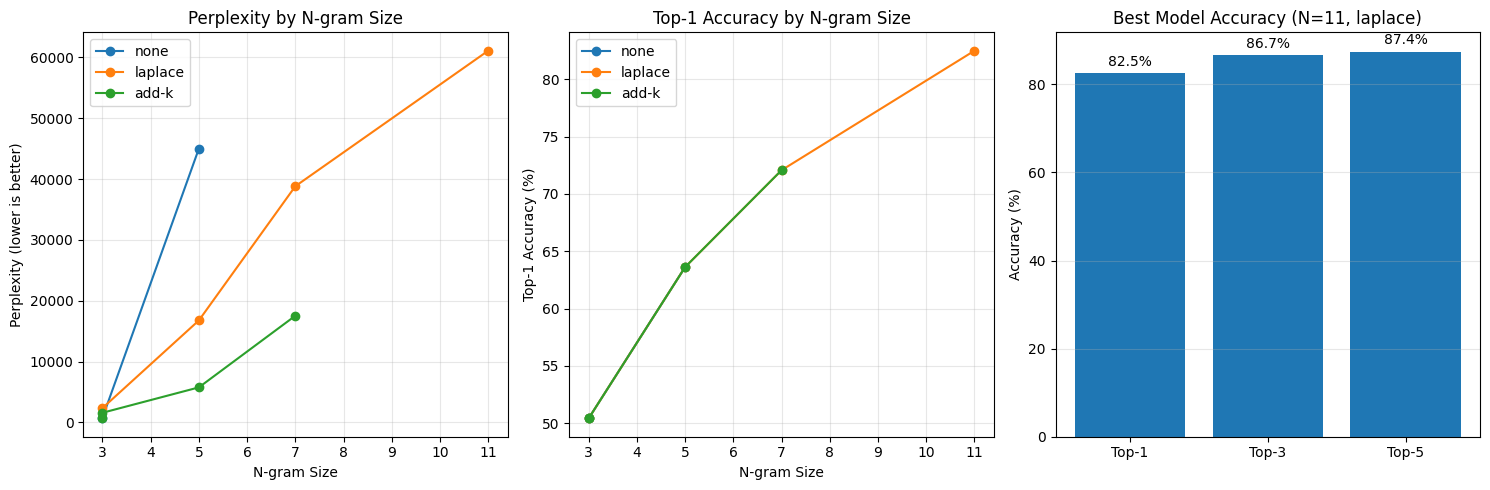

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Perplexity by N
ax1 = axes[0]
for smoothing in results_df['smoothing'].unique():
    data = results_df[results_df['smoothing'] == smoothing]
    ax1.plot(data['n'], data['perplexity'], marker='o', label=smoothing)
ax1.set_xlabel('N-gram Size')
ax1.set_ylabel('Perplexity (lower is better)')
ax1.set_title('Perplexity by N-gram Size')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Top-1 Accuracy by N
ax2 = axes[1]
for smoothing in results_df['smoothing'].unique():
    data = results_df[results_df['smoothing'] == smoothing]
    ax2.plot(data['n'], data['top1_acc']*100, marker='o', label=smoothing)
ax2.set_xlabel('N-gram Size')
ax2.set_ylabel('Top-1 Accuracy (%)')
ax2.set_title('Top-1 Accuracy by N-gram Size')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Accuracy comparison for best model
ax3 = axes[2]
accuracies = [best_acc['top1_acc'], best_acc['top3_acc'], best_acc['top5_acc']]
labels = ['Top-1', 'Top-3', 'Top-5']
bars = ax3.bar(labels, [a*100 for a in accuracies])
ax3.set_ylabel('Accuracy (%)')
ax3.set_title(f'Best Model Accuracy (N={int(best_acc["n"])}, {best_acc["smoothing"]})')
ax3.grid(True, alpha=0.3, axis='y')

# Add values on bars
for bar, val in zip(bars, accuracies):
    ax3.text(bar.get_x() + bar.get_width()/2, val*100 + 1, 
            f'{val*100:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### 7. Performance by Code Complexity


Performance by Code Complexity
Training 11-gram model...
Training complete. Vocabulary size: 95438


Evaluating: 100%|██████████| 50/50 [00:00<00:00, 441.58it/s]

     complexity  samples  top1_acc  top5_acc
      Low (1-2)       50 83.922046 88.550548
   Medium (3-5)       50 85.188867 89.463221
    High (6-10)       50 77.388535 82.484076
Very High (>10)       50 73.440000 82.080000


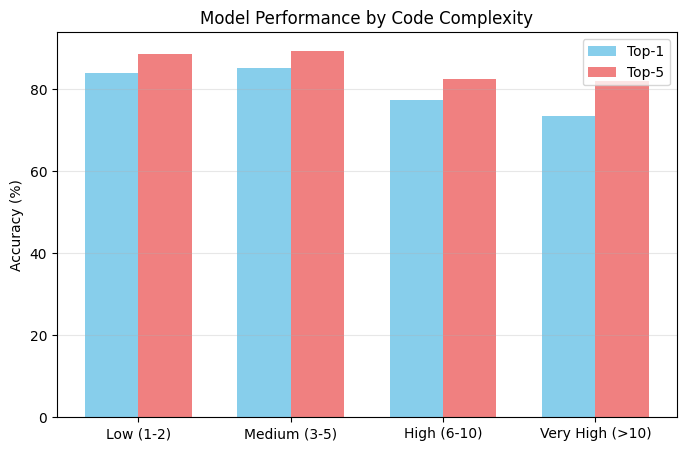

In [65]:
# Analyze performance by complexity
print("\nPerformance by Code Complexity")
print("="*50)

# Train best model
best_model = NGramModel(
    n=int(best_acc['n']), 
    smoothing=best_acc['smoothing'],
    k=0.1 if best_acc['smoothing'] == 'add-k' else 1.0
)
best_model.train(train_df)

# test data by complexity
complexity_levels = pd.cut(
    test_df['metrics_cyclomatic_complexity'], 
    bins=[0, 2, 5, 10, float('inf')],
    labels=['Low (1-2)', 'Medium (3-5)', 'High (6-10)', 'Very High (>10)']
)

complexity_results = []
for level in ['Low (1-2)', 'Medium (3-5)', 'High (6-10)', 'Very High (>10)']:
    level_df = test_df[complexity_levels == level].head(50)
    if len(level_df) > 0:
        accuracy = evaluate_topk_accuracy(best_model, level_df)
        complexity_results.append({
            'complexity': level,
            'samples': len(level_df),
            'top1_acc': accuracy['top1_accuracy']*100,
            'top5_acc': accuracy['top5_accuracy']*100
        })

complexity_df = pd.DataFrame(complexity_results)
print(complexity_df.to_string(index=False))

# Visualize
fig, ax = plt.subplots(figsize=(8, 5))
x = range(len(complexity_df))
width = 0.35
ax.bar([i - width/2 for i in x], complexity_df['top1_acc'], width, label='Top-1', color='skyblue')
ax.bar([i + width/2 for i in x], complexity_df['top5_acc'], width, label='Top-5', color='lightcoral')
ax.set_xticks(x)
ax.set_xticklabels(complexity_df['complexity'])
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Performance by Code Complexity')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.show()


### 8. Evaluation

In [66]:
print("\n🚀 Large-Scale Evaluation on 1000 Test Samples")
print("="*60)

# Evaluate on 1000 samples
large_scale_accuracy = evaluate_topk_accuracy(best_model, test_df.head(1000))

print(f"Top-1 Accuracy: {large_scale_accuracy['top1_accuracy']*100:.2f}%")
print(f"Top-3 Accuracy: {large_scale_accuracy['top3_accuracy']*100:.2f}%")
print(f"Top-5 Accuracy: {large_scale_accuracy['top5_accuracy']*100:.2f}%")
print(f"Total predictions evaluated: {large_scale_accuracy['total_predictions']:,}")


🚀 Large-Scale Evaluation on 1000 Test Samples


Evaluating: 100%|██████████| 1000/1000 [00:02<00:00, 450.41it/s]

Top-1 Accuracy: 82.82%
Top-3 Accuracy: 87.17%
Top-5 Accuracy: 87.74%
Total predictions evaluated: 16,142


### Sample Predictions

In [67]:
import pandas as pd
from tqdm import tqdm
import json
import random

print("--- Training the Final Model ---")
best_config = {'n': 5, 'smoothing': 'laplace'}
best_model = NGramModel(
    n=best_config['n'],
    smoothing=best_config['smoothing']
)
best_model.train(train_df)
print("Final model training complete.")


# Predictions with the Trained Model ---

# Configuration
NUM_SAMPLES = 1000
MIN_CONTEXT_SIZE = 3
MAX_CONTEXT_SIZE = 10
MAX_COMPLETION_TOKENS = 50

# Setup
large_scale_samples = test_df.head(NUM_SAMPLES)
prediction_results = []

print(f"\n Generating predictions for {NUM_SAMPLES} test samples...")

# text-based progress bar
for idx, row in tqdm(large_scale_samples.iterrows(), total=len(large_scale_samples)):
    try:
        tokens = json.loads(row['code_tokens'])
    except:
        tokens = eval(row['code_tokens']) # Fallback

    if len(tokens) <= MIN_CONTEXT_SIZE:
        continue

    # context size randomly selected
    effective_max_context = min(MAX_CONTEXT_SIZE, len(tokens) - 1)
    context_size = random.randint(MIN_CONTEXT_SIZE, effective_max_context)

    input_context = tokens[:context_size]

    # next 5 possible tokens and their probabilities
    next_tokens_with_probs = best_model.predict_next_tokens(input_context, top_k=5)

    formatted_predictions = ", ".join([f"{token} ({prob:.3f})" for token, prob in next_tokens_with_probs])

    # sampled completion
    completion, _ = best_model.sample_completion(input_context, max_length=MAX_COMPLETION_TOKENS)
    full_completion_str = ' '.join(input_context) + ' ' + ' '.join(completion)

    prediction_results.append({
        'input_context': ' '.join(input_context),
        'next_5_tokens (probability)': formatted_predictions,
        'sampled_completion': full_completion_str
    })

predictions_df = pd.DataFrame(prediction_results)
output_csv_path = 'sample_prediction.csv'
predictions_df.to_csv(output_csv_path, index=False)

print(f"\nSuccessfully generated predictions and saved them to '{output_csv_path}'")
display(predictions_df.head())

--- Training the Final Model ---
Training 5-gram model...
Training complete. Vocabulary size: 95438
Final model training complete.

 Generating predictions for 1000 test samples...


100%|██████████| 1000/1000 [00:00<00:00, 1521.76it/s]


Successfully generated predictions and saved them to 'sample_prediction.csv'


,input_context,next_5_tokens (probability),sampled_completion
0,void throwFileNotFound private (,,void throwFileNotFound private (
1,void testBiggest public,,void testBiggest public
2,void testAllIsNotAllowedInShardLevelRequests p...,"( (0.043), { (0.028), @ (0.025), if (0.013), <...",void testAllIsNotAllowedInShardLevelRequests p...
3,toEvaluator public . Factory ( ),"{ (0.000), Strings (0.000), ( (0.000), ArrayLi...",toEvaluator public . Factory ( ) { }
4,"ConditionOutcome getMatchOutcome public ( , )","{ (0.009), throws (0.004)","ConditionOutcome getMatchOutcome public ( , ) { }"


### 10. Final Summary

In [68]:

print("\n" + "="*60)
print("EXPERIMENT SUMMARY")
print("="*60)

print(f"""
Best Configuration:
- N-gram size: {int(best_acc['n'])}
- Smoothing: {best_acc['smoothing']}
- Perplexity: {best_acc['perplexity']:.2f}

Performance on 1000 test samples:
- Top-1 Accuracy: {large_scale_accuracy['top1_accuracy']*100:.2f}%
- Top-3 Accuracy: {large_scale_accuracy['top3_accuracy']*100:.2f}%
- Top-5 Accuracy: {large_scale_accuracy['top5_accuracy']*100:.2f}%
""")


EXPERIMENT SUMMARY

Best Configuration:
- N-gram size: 11
- Smoothing: laplace
- Perplexity: 61109.71

Performance on 1000 test samples:
- Top-1 Accuracy: 82.82%
- Top-3 Accuracy: 87.17%
- Top-5 Accuracy: 87.74%



In [69]:
# Save results
results_df.to_csv('experiment_results.csv', index=False)
print("Results saved to 'experiment_results.csv'")

Results saved to 'experiment_results.csv'
